In [19]:
import os
import yfinance as yf
import pandas as pd
from statsmodels.tsa.stattools import acf
import numpy as np 
import shutil
from datetime import datetime
import matplotlib.pyplot as plt

# downloading the data

In [20]:
def create_subfolders(stock_tickers, base_folder):
    for ticker in stock_tickers:
        subfolder_name = ticker.replace('.', '_')
        subfolder_path = os.path.join(base_folder, subfolder_name)
        
        # Create subfolder if it doesn't exist
        os.makedirs(subfolder_path, exist_ok=True)

def download_and_save_data(stock_tickers, base_folder, start_date, end_date):
    for ticker in stock_tickers:
        subfolder_name = ticker.replace('.', '_')
        subfolder_path = os.path.join(base_folder, subfolder_name)

        # Download data
        data = yf.download(ticker, start=start_date, end=end_date)
        
        # Save data to CSV for each year
        for year in data.index.year.unique():
            year_data = data[data.index.year == year]
            file_path = os.path.join(subfolder_path, f'{ticker}_data_{year}.csv')
            year_data.to_csv(file_path)

# Example usage:
stock_tickers = [
    'HDB', 'ICICIBANK.BO', 'INFY.NS', 'HCLTECH.BO', 'ITC.NS',
    'HINDUNILVR.BO', 'TATASTEEL.NS', 'HINDALCO.BO', 'DIVISLAB.BO', 'BHARTIARTL.NS'
]

base_folder = r'C:\Users\Sailendra\Desktop\everything i need\stocks internship5 question'
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create subfolders
create_subfolders(stock_tickers, base_folder)

# Download and save data to subfolders for each year
download_and_save_data(stock_tickers, base_folder, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


calculating return and risk

In [21]:
def calculate_returns_and_risk(stock_tickers, base_folder):
    for ticker in stock_tickers:
        subfolder_name = ticker.replace('.', '_')
        subfolder_path = os.path.join(base_folder, subfolder_name)

        for file_name in os.listdir(subfolder_path):
            if file_name.endswith('.csv'):
                file_path = os.path.join(subfolder_path, file_name)

                # Load data from CSV
                data = pd.read_csv(file_path, index_col='Date', parse_dates=True)

                # Calculate daily returns
                data['Daily_Return'] = data['Adj Close'].pct_change()

                # Calculate risk (standard deviation)
                risk = data['Daily_Return'].std()
                data['Risk'] = risk
                data.to_csv(file_path)
                # Print or save the calculated risk

organising the files into folders

In [22]:
for ticker in stock_tickers:
    # Replace dots with underscores in the ticker
    folder_name = ticker.replace('.', '_')

    # Source path for the stock's annual data
    stock_folder_path = os.path.join(base_folder, folder_name)

    # Destination path for the stock's annual data within the common folder
    destination_stock_path = os.path.join(base_folder, folder_name)

    # Check if the destination path already exists
  

    # Move the entire stock folder to the destination
    shutil.move(stock_folder_path, destination_stock_path)

In [23]:
calculate_returns_and_risk(stock_tickers, base_folder)

finding the periodicity of the stocks

In [24]:
def find_dominant_frequency(signal, sampling_rate):
    n = len(signal)
    freq = np.fft.fftfreq(n, d=1/sampling_rate)
    fft_values = np.fft.fft(signal)
    magnitude = np.abs(fft_values)
    
    # Exclude the DC component
    idx = np.argmax(magnitude[1:]) + 1
    dominant_frequency = np.abs(freq[idx])
    
    return dominant_frequency

In [25]:
common_returns = []
annual_stock_data_folder = r'C:\Users\Sailendra\Desktop\everything i need\stocks internship5 question\annual_stock_data_folder'

# Iterate over each stock
for ticker in stock_tickers:
    # Replace dots with underscores in the ticker
    folder_name = ticker.replace('.', '_')

    # Source path for the stock's annual data
    stock_folder_path = os.path.join(base_folder, folder_name)

    # Destination path for the stock's annual data within the common folder
    destination_stock_path = os.path.join(base_folder, folder_name)

    # Check if the destination path already exists
    if os.path.exists(destination_stock_path):
        # If it does, create a new folder with a timestamp
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        new_destination_stock_path = os.path.join(base_folder, f"{folder_name}_{timestamp}")

        # Move the existing folder to the new path
        shutil.move(destination_stock_path, new_destination_stock_path)

        print(f"Folder already exists. Moving {folder_name} to {new_destination_stock_path}")

        # Update the stock_folder_path to the new destination
        stock_folder_path = new_destination_stock_path

    # Check if the stock folder exists before listing its contents
    if os.path.exists(stock_folder_path):
        # Iterate over each CSV file in the stock's subfolder
        for file_name in sorted(os.listdir(stock_folder_path)):
            if file_name.endswith(".csv"):
                file_path = os.path.join(stock_folder_path, file_name)

                # Read the CSV file
                data = pd.read_csv(file_path, index_col=0)

                # Compute daily percentage returns
                data['Daily_Returns'] = data['Adj Close'].pct_change() * 100

                # Add daily returns to a common list
                common_returns.extend(data['Daily_Returns'].dropna())
    else:
        print(f"Stock folder not found: {stock_folder_path}")
for ticker in stock_tickers:
    # Replace dots with underscores in the ticker
    folder_name = ticker.replace('.', '_')

    # Source path for the stock's annual data
    stock_folder_path = os.path.join(base_folder, folder_name)

    # Destination path for the stock's annual data within the common folder
    destination_stock_path = os.path.join(base_folder, folder_name)

    # Check if the destination path already exists
    if os.path.exists(destination_stock_path):
        # If it does, create a new folder with a timestamp
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        new_destination_stock_path = os.path.join(base_folder, f"{folder_name}_{timestamp}")

        # Move the existing folder to the new path
        shutil.move(destination_stock_path, new_destination_stock_path)

        print(f"Folder already exists. Moving {folder_name} to {new_destination_stock_path}")

        # Update the stock_folder_path to the new destination
        stock_folder_path = new_destination_stock_path

    # Check if the stock folder exists before listing its contents
    if os.path.exists(stock_folder_path):
        # Iterate over each CSV file in the stock's subfolder
        for file_name in sorted(os.listdir(stock_folder_path)):
            if file_name.endswith(".csv"):
                file_path = os.path.join(stock_folder_path, file_name)

                # Read the CSV file
                data = pd.read_csv(file_path, index_col=0)

                # Compute daily percentage returns
                data['Daily_Returns'] = data['Adj Close'].pct_change() * 100

                # Add daily returns to a common list
                common_returns.extend(data['Daily_Returns'].dropna())
    else:
        print(f"Stock folder not found: {stock_folder_path}")

# Find dominant frequency for the aggregated data
dominant_frequency = find_dominant_frequency(common_returns, 1)

# Calculate corresponding period in years (rounded to the closest integer)
if dominant_frequency != 0:
    common_period = 1 / dominant_frequency
    common_period_years = round(common_period)

    print(f"Common Dominant Periodicity Across Stocks: {common_period_years} years")
else:
    print("No dominant periodicity found.")

Folder already exists. Moving HDB to C:\Users\Sailendra\Desktop\everything i need\stocks internship5 question\HDB_20240315_114726
Folder already exists. Moving ICICIBANK_BO to C:\Users\Sailendra\Desktop\everything i need\stocks internship5 question\ICICIBANK_BO_20240315_114726
Folder already exists. Moving INFY_NS to C:\Users\Sailendra\Desktop\everything i need\stocks internship5 question\INFY_NS_20240315_114727
Folder already exists. Moving HCLTECH_BO to C:\Users\Sailendra\Desktop\everything i need\stocks internship5 question\HCLTECH_BO_20240315_114727
Folder already exists. Moving ITC_NS to C:\Users\Sailendra\Desktop\everything i need\stocks internship5 question\ITC_NS_20240315_114728
Folder already exists. Moving HINDUNILVR_BO to C:\Users\Sailendra\Desktop\everything i need\stocks internship5 question\HINDUNILVR_BO_20240315_114728
Folder already exists. Moving TATASTEEL_NS to C:\Users\Sailendra\Desktop\everything i need\stocks internship5 question\TATASTEEL_NS_20240315_114728
Folder

making a predicting folder

In [26]:
predicting_folder = os.path.join(base_folder, 'predicting_folder')

# Create predicting_folder if it doesn't exist
os.makedirs(predicting_folder, exist_ok=True)

for folder_name in os.listdir(base_folder):
    folder_path = os.path.join(base_folder, folder_name)

    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Iterate over files in the folder
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)

            # Check if the file ends with "2022.csv" or contains "2022" in its name
            if file_name.endswith("2022.csv") or "2022" in file_name:
                # Move the file to the predicting_folder
                new_file_path = os.path.join(predicting_folder, file_name)
                
                # Use shutil.move to handle existing files
                shutil.move(file_path, new_file_path)
                print(f"Moved {file_name} to predicting_folder")
predicting_folder = os.path.join(base_folder, 'predicting_folder')

Moved BHARTIARTL.NS_data_2022.csv to predicting_folder
Moved DIVISLAB.BO_data_2022.csv to predicting_folder
Moved HCLTECH.BO_data_2022.csv to predicting_folder
Moved HDB_data_2022.csv to predicting_folder
Moved HINDALCO.BO_data_2022.csv to predicting_folder
Moved HINDUNILVR.BO_data_2022.csv to predicting_folder
Moved ICICIBANK.BO_data_2022.csv to predicting_folder
Moved INFY.NS_data_2022.csv to predicting_folder
Moved ITC.NS_data_2022.csv to predicting_folder
Moved BHARTIARTL.NS_data_2022.csv to predicting_folder
Moved DIVISLAB.BO_data_2022.csv to predicting_folder
Moved HCLTECH.BO_data_2022.csv to predicting_folder
Moved HDB_data_2022.csv to predicting_folder
Moved HINDALCO.BO_data_2022.csv to predicting_folder
Moved HINDUNILVR.BO_data_2022.csv to predicting_folder
Moved ICICIBANK.BO_data_2022.csv to predicting_folder
Moved INFY.NS_data_2022.csv to predicting_folder
Moved ITC.NS_data_2022.csv to predicting_folder
Moved TATASTEEL.NS_data_2022.csv to predicting_folder


calculating the avg risk and return for the predicting stocks

In [27]:
stock_avg_values = {}
stock_risk_values = {}

# Iterate over files in the predicting folder


# Iterate over files in the predicting folder
for file_name in os.listdir(predicting_folder):
    file_path = os.path.join(predicting_folder, file_name)

    # Check if the file is a CSV file
    if file_name.endswith(".csv"):
        # Read the CSV file
        data = pd.read_csv(file_path, index_col='Date', parse_dates=True)

        # Extract the stock name from the file name
        stock_name = file_name.split('_')[0]

        # Calculate average daily returns
        avg_return = data['Daily_Return'].mean()

        # Add the average return value to the dictionary
        stock_avg_values[stock_name] = avg_return

        # Add the 'avg_return' column to the DataFrame
        data['avg_return'] = avg_return

        # Calculate risk (standard deviation of returns) and add a new column
        risk = data['Daily_Return'].std()
        data['Risk'] = risk
        stock_risk_values[stock_name] = risk
        # Save the updated data back to the CSV file
        data.to_csv(file_path, index=True)

        print(f"Added Avg_Return and Risk columns to {file_name}")

Added Avg_Return and Risk columns to BHARTIARTL.NS_data_2022.csv
Added Avg_Return and Risk columns to DIVISLAB.BO_data_2022.csv
Added Avg_Return and Risk columns to HCLTECH.BO_data_2022.csv
Added Avg_Return and Risk columns to HDB_data_2022.csv
Added Avg_Return and Risk columns to HINDALCO.BO_data_2022.csv
Added Avg_Return and Risk columns to HINDUNILVR.BO_data_2022.csv
Added Avg_Return and Risk columns to ICICIBANK.BO_data_2022.csv
Added Avg_Return and Risk columns to INFY.NS_data_2022.csv
Added Avg_Return and Risk columns to ITC.NS_data_2022.csv
Added Avg_Return and Risk columns to TATASTEEL.NS_data_2022.csv


define cost function

In [28]:
def cost_function(investments, avg_returns, risk, min_return_percentage=0.10):
    # Check if the dimensions of inputs match
    if len(investments) != len(avg_returns) != len(risk):
        raise ValueError("Input dimensions do not match.")

    total_risk = np.sum(np.array(list(risk.values())) * np.array(list(investments.values())))
    total_returns = np.sum(np.array(list(avg_returns.values())) * np.array(list(investments.values())))
    
    return total_risk + max(0, min_return_percentage * sum(investments.values()) - total_returns)
 

simulated annealing function

In [29]:
initial_amount_per_stock = 350

# Initialize the investment dictionary
investments = {ticker: initial_amount_per_stock for ticker in stock_tickers}

# Print the resulting investment dictionary
print(investments)

def simulated_annealing(initial_investments, avg_returns, risk, min_return_percentage=0.10, initial_temp=1000, cooling_rate=0.95, num_iterations=1000):
    current_investments = initial_investments.copy()
    current_cost = cost_function(current_investments, avg_returns, risk, min_return_percentage)
    
    best_investments = current_investments.copy()
    best_cost = current_cost
    
    current_temp = initial_temp
    cost_history = []
    iteration_history = []
    for _ in range(num_iterations):
        
        cost_history.append(current_cost)
        iteration_history.append(_)
        # Randomly select a stock to decrease and increase investments
        stock_to_decrease = np.random.choice(list(current_investments.keys()))
        stock_to_increase = np.random.choice([stock for stock in current_investments.keys() if stock != stock_to_decrease])
        
        # Randomly choose a change in investment amount (you can adjust this value)
        change_investment = np.random.uniform(1, 10)
        
        # Calculate new investment distribution
        new_investments = current_investments.copy()
        
        # Ensure that the investment doesn't go below 0
        new_investments[stock_to_decrease] = max(0, new_investments[stock_to_decrease] - change_investment)
        new_investments[stock_to_increase] += change_investment
        
        # Calculate new cost
        new_cost = cost_function(new_investments, avg_returns, risk, min_return_percentage)
        
        # Calculate the change in cost
        delta_E = new_cost - current_cost
        
        # Accept the new solution if it's better or with a certain probability
        if delta_E < 0 or np.random.rand() < np.exp(-delta_E / current_temp):
            current_investments = new_investments
            current_cost = new_cost
        
        # Update the best solution if needed
        if current_cost < best_cost:
            best_investments = current_investments.copy()
            best_cost = current_cost
        
        # Cool down the temperature
        current_temp *= cooling_rate
        
    plt.plot(iteration_history, cost_history)
    plt.xlabel('Iteration')
    plt.ylabel('Objective Function (Cost)')
    plt.title('Simulated Annealing Optimization')
    plt.show()
    global range1
    range1=(min(cost_history), max(cost_history))
    
    return best_investments, best_cost

{'HDB': 350, 'ICICIBANK.BO': 350, 'INFY.NS': 350, 'HCLTECH.BO': 350, 'ITC.NS': 350, 'HINDUNILVR.BO': 350, 'TATASTEEL.NS': 350, 'HINDALCO.BO': 350, 'DIVISLAB.BO': 350, 'BHARTIARTL.NS': 350}


calling the sim function for diff temp


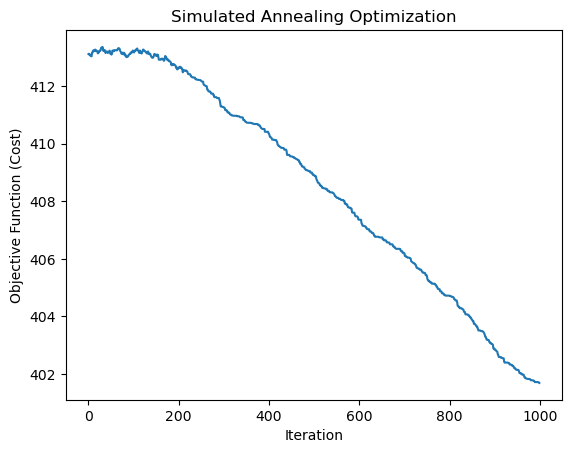

Best Investments (1000): {'HDB': 572.9468942825291, 'ICICIBANK.BO': 198.7563247817567, 'INFY.NS': 411.7773029172973, 'HCLTECH.BO': 101.57845301990585, 'ITC.NS': 0.5973277696413879, 'HINDUNILVR.BO': 468.32202033662173, 'TATASTEEL.NS': 639.2233968331858, 'HINDALCO.BO': 310.09155115579273, 'DIVISLAB.BO': 788.4201266751945, 'BHARTIARTL.NS': 8.286602228074079}
Best Cost (1000): 401.56749645038167
Range (1000): (401.6897868191014, 413.36432616667173)


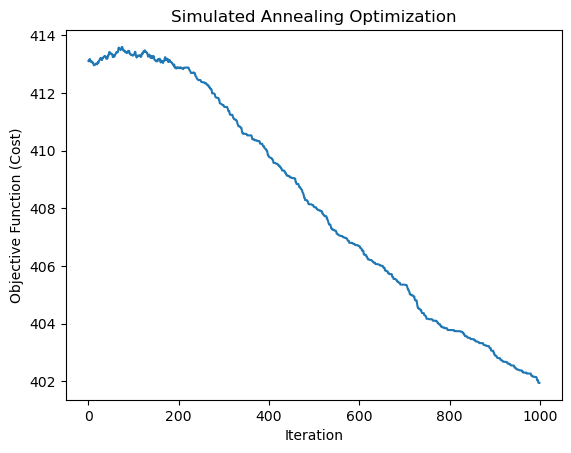

Best Investments (1500): {'HDB': 711.9825433534706, 'ICICIBANK.BO': 183.3527397306267, 'INFY.NS': 423.63371240558996, 'HCLTECH.BO': 156.29621350783069, 'ITC.NS': 0.6580826212739113, 'HINDUNILVR.BO': 487.7879920785944, 'TATASTEEL.NS': 621.5284836075705, 'HINDALCO.BO': 248.44797007329453, 'DIVISLAB.BO': 665.0365115078841, 'BHARTIARTL.NS': 1.2757511138641089}
Best Cost (1500): 401.94656508167645
Range (1500): (401.94656508167645, 413.60181890033624)


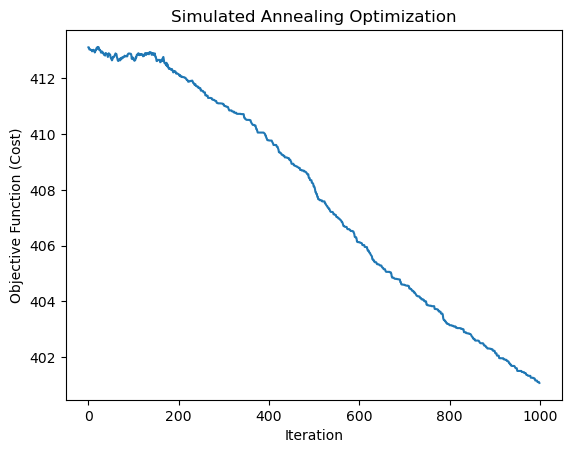

Best Investments (2000): {'HDB': 496.5056541416962, 'ICICIBANK.BO': 181.64331426545328, 'INFY.NS': 358.19044004164874, 'HCLTECH.BO': 73.16862251491268, 'ITC.NS': 0.217745464141746, 'HINDUNILVR.BO': 490.827073004675, 'TATASTEEL.NS': 748.3343649119889, 'HINDALCO.BO': 343.6221179431062, 'DIVISLAB.BO': 805.390392890432, 'BHARTIARTL.NS': 2.100274821944869}
Best Cost (2000): 401.0750062195214
Range (2000): (401.0750062195214, 413.13069374231355)
The initial temperature with the widest range is 2000


In [30]:
initial_investments = {ticker: 350 for ticker in stock_tickers}
ranges = []

# Define the initial temperatures to test
initial_temps = [1000, 1500, 2000]

# Loop through each initial temperature
for temp in initial_temps:
    # Run simulated annealing with the current initial temperature
    best_investments, best_cost = simulated_annealing(initial_investments, stock_avg_values, stock_risk_values, initial_temp=temp)
    
    # Print the results (optional)
    print(f"Best Investments ({temp}):", best_investments)
    print(f"Best Cost ({temp}):", best_cost)
    print(f"Range ({temp}):", range1)
    
    # Store the range in the list
    ranges.append(range1)
max_range_index = max(range(len(initial_temps)), key=lambda i: ranges[i][1] - ranges[i][0])

# Identify the initial temperature with the maximum range
max_range_temp = initial_temps[max_range_index]

# Print the result
print(f"The initial temperature with the widest range is {max_range_temp}")

final analysis

In [44]:
import numpy as np

def final_analysis(initial_investments, avg_returns, risk, min_return_percentage=0.10, initial_temp=max_range_temp, cooling_rate=0.95, num_iterations=1000, num_runs_per_temp=20):
    best_investments = None
    best_cost = float('inf')  # Initialize best_cost to a large value
    best_cost_history = None  # Initialize best_cost_history

    for _ in range(num_runs_per_temp):
        current_investments = initial_investments.copy()
        current_cost = cost_function(current_investments, avg_returns, risk, min_return_percentage)

        current_temp = initial_temp

        cost_history = []  # Initialize cost_history for each run

        for iteration in range(num_iterations):
            # Same optimization process as before
            cost_history.append(current_cost)
        
            # Randomly select a stock to decrease and increase investments
            stock_to_decrease = np.random.choice(list(current_investments.keys()))
            stock_to_increase = np.random.choice([stock for stock in current_investments.keys() if stock != stock_to_decrease])

            # Randomly choose a change in investment amount (you can adjust this value)
            change_investment = np.random.uniform(1, 10)

            # Calculate new investment distribution
            new_investments = current_investments.copy()

            # Ensure that the investment doesn't go below 0
            new_investments[stock_to_decrease] = max(0, new_investments[stock_to_decrease] - change_investment)
            new_investments[stock_to_increase] += change_investment

            # Calculate new cost
            new_cost = cost_function(new_investments, avg_returns, risk, min_return_percentage)

            # Calculate the change in cost
            delta_E = new_cost - current_cost

            # Append current_cost to cost_history
            cost_history.append(current_cost)
            if delta_E < 0 or np.random.rand() < np.exp(-delta_E / current_temp):
                current_investments = new_investments
                current_cost = new_cost
        
        # Update the best solution if needed
           
        
        # Cool down the temperature
            

            # Same iteration process as before

            # Cool down the temperature after each iteration
            current_temp *= cooling_rate

        # Check if the current run resulted in a lower cost than the previous best
        if current_cost < best_cost:
            best_investments = current_investments.copy()
            best_cost = current_cost
            best_cost_history = cost_history  # Update best_cost_history

    return best_investments, best_cost, best_cost_history  # Return best_cost_history as well


calling the final analysis function

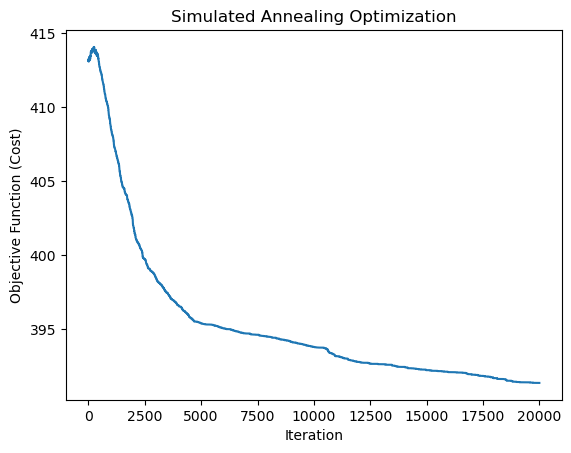

{'HDB': 125.19713606490738, 'ICICIBANK.BO': 0.18434935847845035, 'INFY.NS': 0.597858666672733, 'HCLTECH.BO': 0.8129543355901063, 'ITC.NS': 0, 'HINDUNILVR.BO': 0.8872764471223746, 'TATASTEEL.NS': 804.71885062248, 'HINDALCO.BO': 0.8130479183202937, 'DIVISLAB.BO': 2566.226429363875, 'BHARTIARTL.NS': 0.8182123973159832}


391.35984880474757

In [54]:
best_investments, best_cost, cost_history = final_analysis(initial_investments, stock_avg_values, stock_risk_values,num_iterations=10000)

# Example usage of plotting code:
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Objective Function (Cost)')
plt.title('Simulated Annealing Optimization')
plt.show()

print(best_investments)
best_cost